In [0]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import col, count, when, explode, split, trim, desc
from pyspark.sql.types import *
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd


In [0]:
sns.set_style("whitegrid")
plt.rcParams['figure.facecolor'] = 'white'

In [0]:
file_path = "/Volumes/workspace/default/netflix/cleaned_netflix_titles/part-00002-tid-3143643023529167748-c6f520ae-cdd0-4981-967e-9ff41e1d127f-234-1-c000.csv"

df = spark.read.csv(file_path, header=True, inferSchema=True)

In [0]:
print(f"  Total Records: {df.count():,}")
print(f"  Total Columns: {len(df.columns)}")

print("\nColumn Names:")
for col in df.columns:
    print(f"  - {col}")

print("\nData Types:")
df.printSchema()

  Total Records: 4,103
  Total Columns: 16

Column Names:
  - show_id
  - type
  - title
  - director
  - cast
  - country
  - date_added
  - release_year
  - rating
  - duration
  - listed_in
  - description
  - duration_int
  - duration_type
  - added_year
  - added_month

Data Types:
root
 |-- show_id: string (nullable = true)
 |-- type: string (nullable = true)
 |-- title: string (nullable = true)
 |-- director: string (nullable = true)
 |-- cast: string (nullable = true)
 |-- country: string (nullable = true)
 |-- date_added: string (nullable = true)
 |-- release_year: integer (nullable = true)
 |-- rating: string (nullable = true)
 |-- duration: string (nullable = true)
 |-- listed_in: string (nullable = true)
 |-- description: string (nullable = true)
 |-- duration_int: integer (nullable = true)
 |-- duration_type: string (nullable = true)
 |-- added_year: integer (nullable = true)
 |-- added_month: integer (nullable = true)



In [0]:
print("\nSample Data (First 5 rows):")
df.show(5, truncate=True)


Sample Data (First 5 rows):
+-------+-------+--------------------+---------------+--------------------+--------------------+----------------+------------+------+---------+--------------------+--------------------+------------+-------------+----------+-----------+
|show_id|   type|               title|       director|                cast|             country|      date_added|release_year|rating| duration|           listed_in|         description|duration_int|duration_type|added_year|added_month|
+-------+-------+--------------------+---------------+--------------------+--------------------+----------------+------------+------+---------+--------------------+--------------------+------------+-------------+----------+-----------+
|   s579|  movie| Memoirs of a Geisha|   Rob Marshall|Zhang Ziyi, Ken W...|France, Japan, Un...|    July 1, 2021|        2005| PG-13|  145 min|Dramas, Romantic ...|Sold to a geisha ...|         145|      minutes|      2021|          7|
|  s2322|  movie|George Lop

In [0]:
print("TASK 1: CONTENT GROWTH OVER TIME ANALYSIS")

TASK 1: CONTENT GROWTH OVER TIME ANALYSIS


In [0]:
print("\n[Analysis 1.1] Content Growth by Release Year")
content_by_year = df.filter(df.release_year.isNotNull()) \
    .groupBy("release_year") \
    .agg(count("*").alias("content_count")) \
    .orderBy("release_year")

print("\nContent statistics by release year:")
content_by_year.describe().show()


[Analysis 1.1] Content Growth by Release Year

Content statistics by release year:
+-------+------------------+------------------+
|summary|      release_year|     content_count|
+-------+------------------+------------------+
|  count|                69|                69|
|   mean|1985.2898550724638| 59.46376811594203|
| stddev|  23.0435019865084|128.23399793646368|
|    min|              1925|                 1|
|    max|              2021|               511|
+-------+------------------+------------------+



In [0]:
print("\nRecent years (2015-2024):")
content_by_year.filter((content_by_year.release_year >= 2015) & (content_by_year.release_year <= 2024)).show()



Recent years (2015-2024):
+------------+-------------+
|release_year|content_count|
+------------+-------------+
|        2015|          262|
|        2016|          446|
|        2017|          487|
|        2018|          511|
|        2019|          470|
|        2020|          456|
|        2021|          280|
+------------+-------------+



In [0]:
content_by_year_pd = content_by_year.toPandas()

In [0]:
content_by_year_pd = content_by_year_pd.dropna()

In [0]:
content_filtered = content_by_year_pd[content_by_year_pd['release_year'] >= 1950]

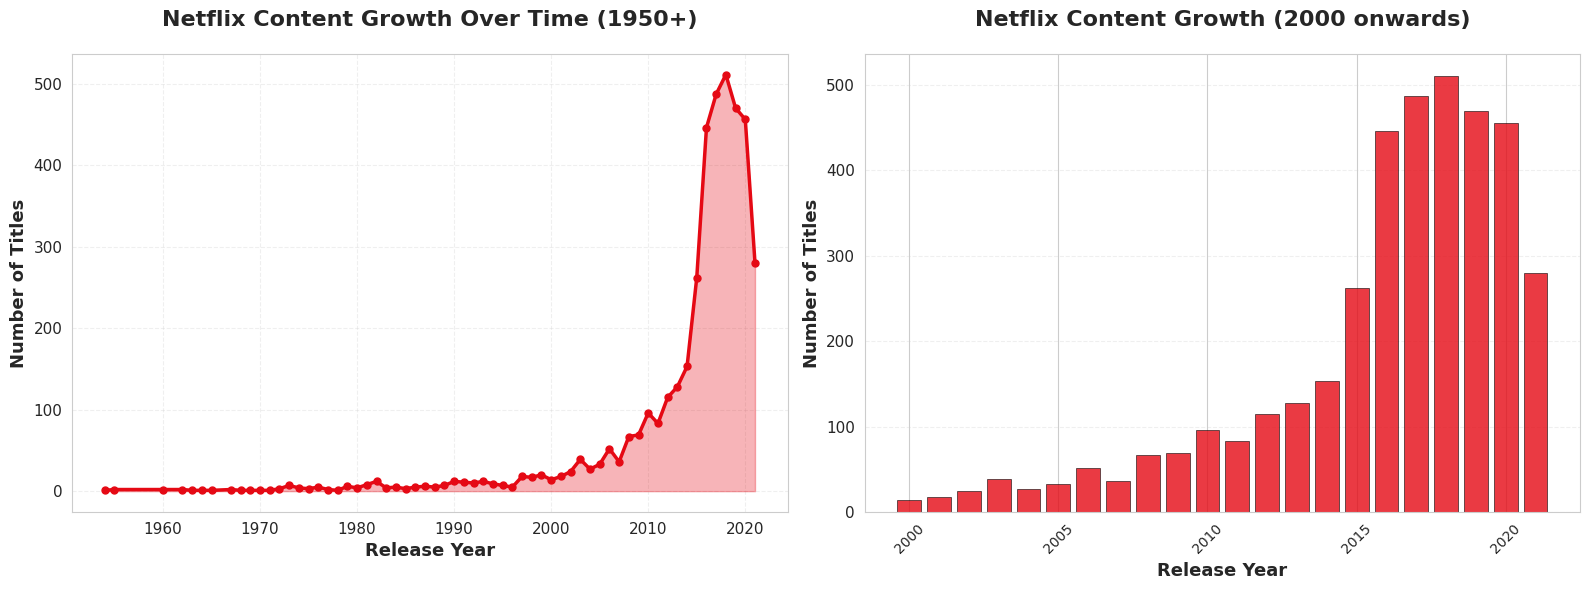

In [0]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

ax1.plot(content_filtered['release_year'], 
         content_filtered['content_count'], 
         marker='o', linewidth=2.5, markersize=5, color='#E50914')
ax1.fill_between(content_filtered['release_year'], 
                  content_filtered['content_count'], 
                  alpha=0.3, color='#E50914')
ax1.set_title('Netflix Content Growth Over Time (1950+)', 
              fontsize=16, fontweight='bold', pad=20)
ax1.set_xlabel('Release Year', fontsize=13, fontweight='bold')
ax1.set_ylabel('Number of Titles', fontsize=13, fontweight='bold')
ax1.grid(True, alpha=0.3, linestyle='--')
ax1.tick_params(labelsize=11)

recent_years = content_by_year_pd[content_by_year_pd['release_year'] >= 2000]
bars = ax2.bar(recent_years['release_year'], 
               recent_years['content_count'], 
               color='#E50914', alpha=0.8, edgecolor='black', linewidth=0.5)
ax2.set_title('Netflix Content Growth (2000 onwards)', 
              fontsize=16, fontweight='bold', pad=20)
ax2.set_xlabel('Release Year', fontsize=13, fontweight='bold')
ax2.set_ylabel('Number of Titles', fontsize=13, fontweight='bold')
ax2.tick_params(axis='x', rotation=45, labelsize=10)
ax2.tick_params(axis='y', labelsize=11)
ax2.grid(True, alpha=0.3, axis='y', linestyle='--')

plt.tight_layout()
plt.show()

In [0]:
print("\n[Analysis 1.2] Content Added to Netflix Platform by Year")


[Analysis 1.2] Content Added to Netflix Platform by Year


In [0]:
content_added_by_year = df.filter(df.added_year.isNotNull()) \
    .groupBy("added_year") \
    .agg(count("*").alias("content_count")) \
    .orderBy("added_year")

print("Content added by year:")
content_added_by_year.show()

Content added by year:
+----------+-------------+
|added_year|content_count|
+----------+-------------+
|      2008|            1|
|      2009|            1|
|      2010|            1|
|      2011|            8|
|      2012|            2|
|      2013|            5|
|      2014|           10|
|      2015|           43|
|      2016|          204|
|      2017|          553|
|      2018|          771|
|      2019|          924|
|      2020|          880|
|      2021|          694|
+----------+-------------+




Year-over-Year Growth Rate:
    added_year  content_count  yoy_growth
0         2008              1         NaN
1         2009              1    0.000000
2         2010              1    0.000000
3         2011              8  700.000000
4         2012              2  -75.000000
5         2013              5  150.000000
6         2014             10  100.000000
7         2015             43  330.000000
8         2016            204  374.418605
9         2017            553  171.078431
10        2018            771   39.421338
11        2019            924   19.844358
12        2020            880   -4.761905
13        2021            694  -21.136364


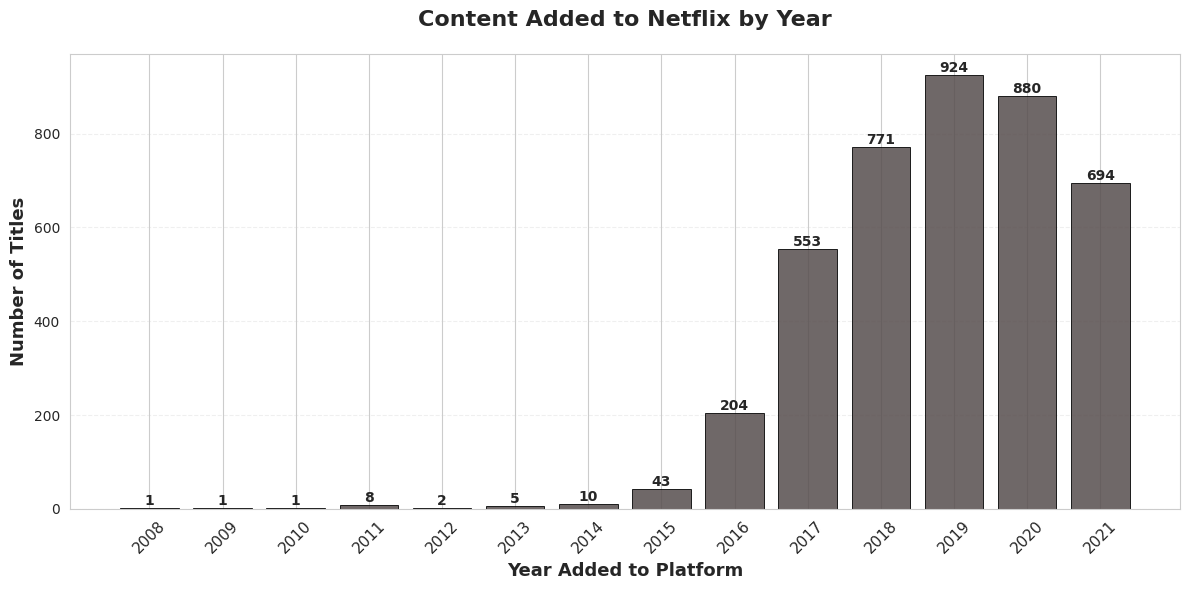

In [0]:
content_added_pd = content_added_by_year.toPandas()
content_added_pd = content_added_pd.dropna()
content_added_pd['yoy_growth'] = content_added_pd['content_count'].pct_change() * 100

print("\nYear-over-Year Growth Rate:")
print(content_added_pd[['added_year', 'content_count', 'yoy_growth']])

plt.figure(figsize=(12, 6))
bars = plt.bar(content_added_pd['added_year'], 
               content_added_pd['content_count'], 
               color='#564d4d', alpha=0.85, edgecolor='black', linewidth=0.7)

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{int(height)}',
             ha='center', va='bottom', fontsize=10, fontweight='bold')

plt.title('Content Added to Netflix by Year', 
          fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Year Added to Platform', fontsize=13, fontweight='bold')
plt.ylabel('Number of Titles', fontsize=13, fontweight='bold')
plt.xticks(content_added_pd['added_year'], rotation=45, fontsize=11)
plt.grid(True, alpha=0.3, axis='y', linestyle='--')
plt.tight_layout()
plt.show()

In [0]:
print("TASK 2: DISTRIBUTION ANALYSIS")


TASK 2: DISTRIBUTION ANALYSIS


In [0]:
print("\n[Analysis 2.1] Content Type Distribution")


In [0]:

content_type_dist = df.filter(df.type.isNotNull()) \
    .groupBy("type") \
    .agg(count("*").alias("count")) \
    .orderBy(desc("count"))

content_type_dist.show()

content_type_pd = content_type_dist.toPandas()
content_type_pd = content_type_pd.dropna()
total_content = content_type_pd['count'].sum()

print(f"\nTotal Content: {total_content:,}")
for idx, row in content_type_pd.iterrows():
    percentage = (row['count'] / total_content) * 100
    print(f"  {row['type']}: {row['count']:,} ({percentage:.1f}%)")


+-------+-----+
|   type|count|
+-------+-----+
|  movie| 2827|
|tv show| 1276|
+-------+-----+


Total Content: 4,103
  movie: 2,827 (68.9%)
  tv show: 1,276 (31.1%)


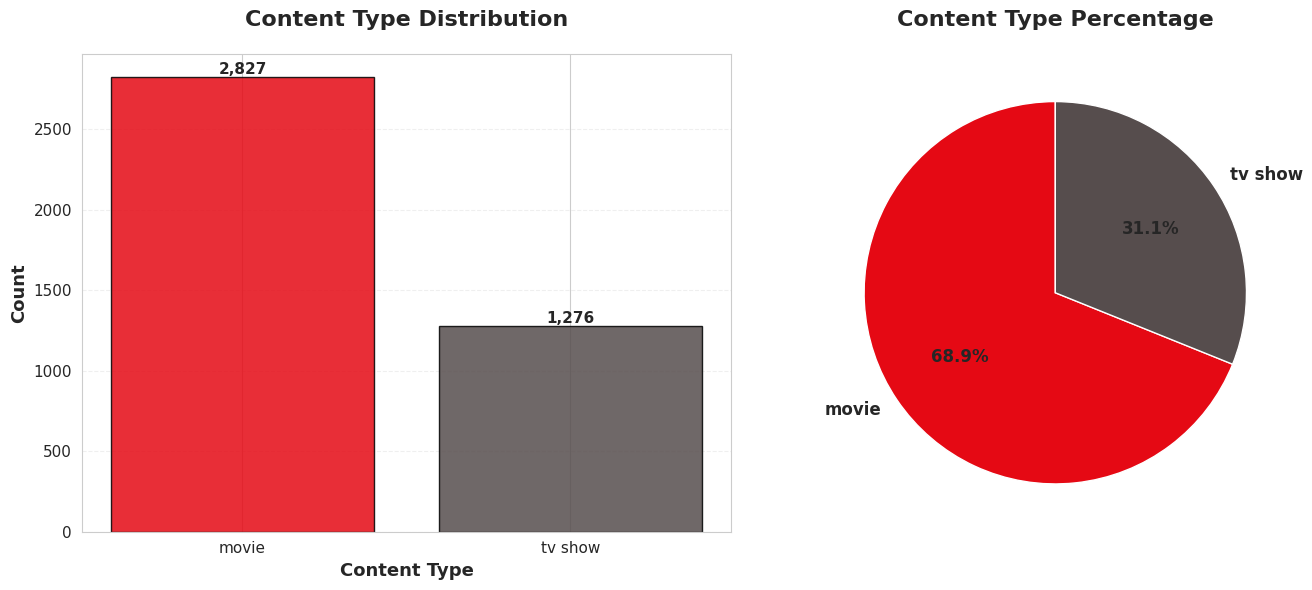

In [0]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# Bar chart
bars = ax1.bar(content_type_pd['type'], content_type_pd['count'], 
               color=['#E50914', '#564d4d'], alpha=0.85, 
               edgecolor='black', linewidth=1)
ax1.set_title('Content Type Distribution', fontsize=16, fontweight='bold', pad=20)
ax1.set_xlabel('Content Type', fontsize=13, fontweight='bold')
ax1.set_ylabel('Count', fontsize=13, fontweight='bold')
ax1.grid(True, alpha=0.3, axis='y', linestyle='--')
ax1.tick_params(labelsize=11)

# Add value labels
for bar in bars:
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2., height,
             f'{int(height):,}',
             ha='center', va='bottom', fontsize=11, fontweight='bold')

# Pie chart
colors = ['#E50914', '#564d4d']
wedges, texts, autotexts = ax2.pie(content_type_pd['count'], 
                                     labels=content_type_pd['type'], 
                                     autopct='%1.1f%%', 
                                     colors=colors, 
                                     startangle=90,
                                     textprops={'fontsize': 12, 'fontweight': 'bold'})
ax2.set_title('Content Type Percentage', fontsize=16, fontweight='bold', pad=20)

plt.tight_layout()
plt.show()

In [0]:
print("\n[Analysis 2.2] Rating Distribution")


[Analysis 2.2] Rating Distribution


In [0]:
rating_dist = df.filter(df.rating.isNotNull()) \
    .groupBy("rating") \
    .agg(count("*").alias("count")) \
    .orderBy(desc("count"))

print("All ratings:")
rating_dist.show(20, truncate=False)

rating_pd = rating_dist.toPandas().head(15)
rating_pd = rating_pd.dropna()

print(f"\nTop 5 Ratings:")
for idx, row in rating_pd.head(5).iterrows():
    print(f"  {idx+1}. {row['rating']}: {row['count']:,} titles")

All ratings:
+---------+-----+
|rating   |count|
+---------+-----+
|TV-MA    |1505 |
|TV-14    |1008 |
|TV-PG    |399  |
|R        |366  |
|PG-13    |222  |
|TV-Y7    |167  |
|PG       |149  |
|TV-Y     |139  |
|TV-G     |91   |
|NR       |38   |
|G        |13   |
|TV-Y7-FV |3    |
|Not Rated|2    |
|NC-17    |1    |
+---------+-----+


Top 5 Ratings:
  1. TV-MA: 1,505 titles
  2. TV-14: 1,008 titles
  3. TV-PG: 399 titles
  4. R: 366 titles
  5. PG-13: 222 titles


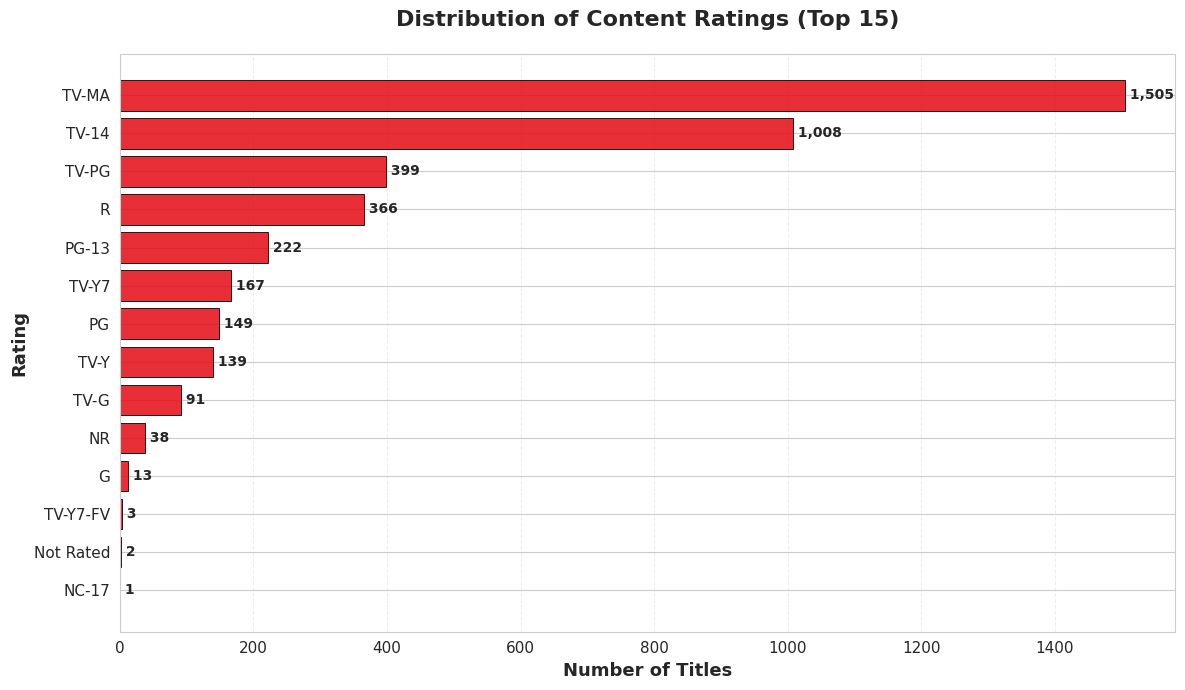

In [0]:

plt.figure(figsize=(12, 7))
bars = plt.barh(rating_pd['rating'], rating_pd['count'], 
                color='#E50914', alpha=0.85, edgecolor='black', linewidth=0.7)
plt.title('Distribution of Content Ratings (Top 15)', 
          fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Number of Titles', fontsize=13, fontweight='bold')
plt.ylabel('Rating', fontsize=13, fontweight='bold')
plt.gca().invert_yaxis()
plt.grid(True, alpha=0.3, axis='x', linestyle='--')
plt.tick_params(labelsize=11)

# Add value labels
for i, bar in enumerate(bars):
    width = bar.get_width()
    plt.text(width, bar.get_y() + bar.get_height()/2.,
             f' {int(width):,}',
             ha='left', va='center', fontsize=10, fontweight='bold')

plt.tight_layout()
plt.show()

In [0]:
print("\n[Analysis 2.3] Genre Distribution")



[Analysis 2.3] Genre Distribution


In [0]:
genres_exploded = df.select(explode(split(df.listed_in, ",")).alias("genre"))
genres_cleaned = genres_exploded.select(trim(genres_exploded.genre).alias("genre"))

genre_dist = genres_cleaned.groupBy("genre") \
    .agg(count("*").alias("count")) \
    .orderBy(desc("count"))

print("Top 20 genres on Netflix:")
genre_dist.show(20, truncate=False)

genre_pd = genre_dist.toPandas().head(20)
genre_pd = genre_pd.dropna()

print(f"\nTop 5 Genres:")
for idx, row in genre_pd.head(5).iterrows():
    print(f"  {idx+1}. {row['genre']}: {row['count']:,} titles")

Top 20 genres on Netflix:
+------------------------+-----+
|genre                   |count|
+------------------------+-----+
|International Movies    |1232 |
|Dramas                  |1131 |
|Comedies                |773  |
|International TV Shows  |641  |
|Documentaries           |394  |
|Action & Adventure      |369  |
|Independent Movies      |351  |
|TV Dramas               |340  |
|Children & Family Movies|297  |
|Romantic Movies         |296  |
|Thrillers               |290  |
|TV Comedies             |286  |
|Crime TV Shows          |217  |
|Kids' TV                |214  |
|Docuseries              |186  |
|Romantic TV Shows       |184  |
|Horror Movies           |174  |
|Stand-Up Comedy         |164  |
|Music & Musicals        |163  |
|Reality TV              |127  |
+------------------------+-----+
only showing top 20 rows

Top 5 Genres:
  1. International Movies: 1,232 titles
  2. Dramas: 1,131 titles
  3. Comedies: 773 titles
  4. International TV Shows: 641 titles
  5. Docum

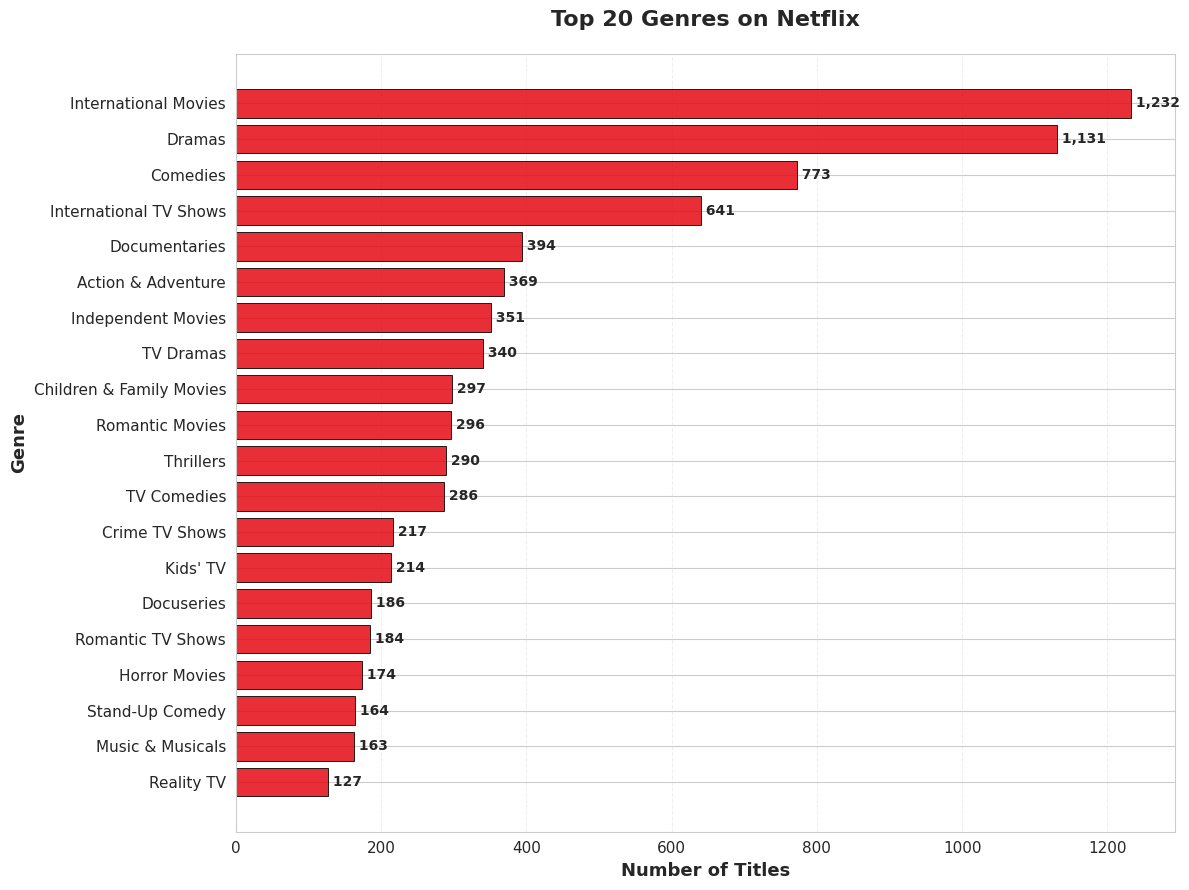

In [0]:

plt.figure(figsize=(12, 9))
bars = plt.barh(genre_pd['genre'], genre_pd['count'], 
                color='#E50914', alpha=0.85, edgecolor='black', linewidth=0.7)
plt.title('Top 20 Genres on Netflix', fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Number of Titles', fontsize=13, fontweight='bold')
plt.ylabel('Genre', fontsize=13, fontweight='bold')
plt.gca().invert_yaxis()
plt.grid(True, alpha=0.3, axis='x', linestyle='--')
plt.tick_params(labelsize=11)

# Add value labels
for i, bar in enumerate(bars):
    width = bar.get_width()
    plt.text(width, bar.get_y() + bar.get_height()/2.,
             f' {int(width):,}',
             ha='left', va='center', fontsize=10, fontweight='bold')

plt.tight_layout()
plt.show()

In [0]:
print("TASK 3: COUNTRY-LEVEL ANALYSIS")

TASK 3: COUNTRY-LEVEL ANALYSIS


In [0]:
countries_exploded = df.select(explode(split(df.country, ",")).alias("country"))
countries_cleaned = countries_exploded.select(trim(countries_exploded.country).alias("country"))
countries_cleaned = countries_cleaned.filter(countries_cleaned.country.isNotNull())

country_dist = countries_cleaned.groupBy("country") \
    .agg(count("*").alias("count")) \
    .orderBy(desc("count"))

print("Top 20 countries contributing content to Netflix:")
country_dist.show(20, truncate=False)

country_pd = country_dist.toPandas().head(20)
country_pd = country_pd.dropna()

print(f"\nTop 5 Content Producing Countries:")
for idx, row in country_pd.head(5).iterrows():
    print(f"  {idx+1}. {row['country']}: {row['count']:,} titles")


Top 20 countries contributing content to Netflix:
+--------------+-----+
|country       |count|
+--------------+-----+
|United States |1747 |
|India         |501  |
|Unknown       |372  |
|United Kingdom|369  |
|Canada        |219  |
|France        |174  |
|Japan         |154  |
|Spain         |115  |
|South Korea   |112  |
|Germany       |103  |
|China         |82   |
|Mexico        |82   |
|Australia     |78   |
|Turkey        |55   |
|Italy         |53   |
|Egypt         |49   |
|Hong Kong     |45   |
|Indonesia     |44   |
|Taiwan        |44   |
|Brazil        |43   |
+--------------+-----+
only showing top 20 rows

Top 5 Content Producing Countries:
  1. United States: 1,747 titles
  2. India: 501 titles
  3. Unknown: 372 titles
  4. United Kingdom: 369 titles
  5. Canada: 219 titles


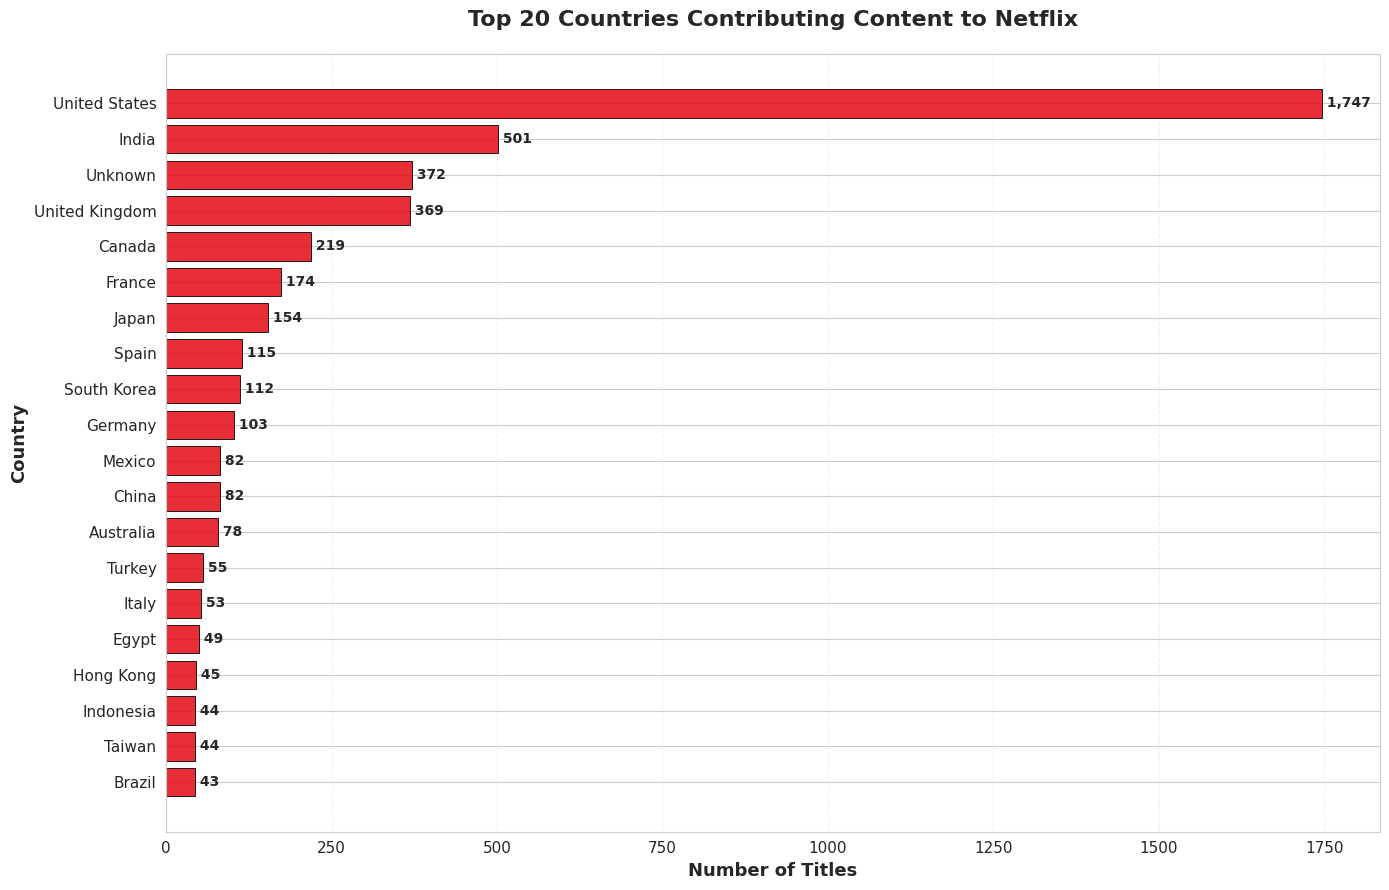

In [0]:

plt.figure(figsize=(14, 9))
bars = plt.barh(country_pd['country'], country_pd['count'], 
                color='#E50914', alpha=0.85, edgecolor='black', linewidth=0.7)
plt.title('Top 20 Countries Contributing Content to Netflix', 
          fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Number of Titles', fontsize=13, fontweight='bold')
plt.ylabel('Country', fontsize=13, fontweight='bold')
plt.gca().invert_yaxis()
plt.grid(True, alpha=0.3, axis='x', linestyle='--')
plt.tick_params(labelsize=11)

# Add value labels
for i, bar in enumerate(bars):
    width = bar.get_width()
    plt.text(width, bar.get_y() + bar.get_height()/2.,
             f' {int(width):,}',
             ha='left', va='center', fontsize=10, fontweight='bold')

plt.tight_layout()
plt.show()

In [0]:
print("\n[Bonus Analysis] Content Type Distribution by Top 10 Countries")


[Bonus Analysis] Content Type Distribution by Top 10 Countries


In [0]:

top_10_countries = country_pd.head(10)['country'].tolist()

country_type_df = df.select(explode(split(df.country, ",")).alias("country"), df.type)
country_type_df = country_type_df.select(trim(country_type_df.country).alias("country"), country_type_df.type)
country_type_df = country_type_df.filter(country_type_df.country.isin(top_10_countries))

country_type_dist = country_type_df.groupBy("country", "type") \
    .agg(count("*").alias("count")) \
    .orderBy("country", "type")

print("Content type breakdown by country:")
country_type_dist.show(20, truncate=False)

# Pivot for visualization
country_type_pd = country_type_dist.toPandas()
country_type_pd = country_type_pd.dropna()
pivot_df = country_type_pd.pivot(index='country', columns='type', values='count').fillna(0)

# Sort by total content
pivot_df['Total'] = pivot_df.sum(axis=1)
pivot_df = pivot_df.sort_values('Total', ascending=True).drop('Total', axis=1)

Content type breakdown by country:
+--------------+-------+-----+
|country       |type   |count|
+--------------+-------+-----+
|Canada        |movie  |156  |
|Canada        |tv show|63   |
|France        |movie  |129  |
|France        |tv show|45   |
|Germany       |movie  |83   |
|Germany       |tv show|20   |
|India         |movie  |456  |
|India         |tv show|45   |
|Japan         |movie  |53   |
|Japan         |tv show|101  |
|South Korea   |movie  |25   |
|South Korea   |tv show|87   |
|Spain         |movie  |83   |
|Spain         |tv show|32   |
|United Kingdom|movie  |246  |
|United Kingdom|tv show|123  |
|United States |movie  |1300 |
|United States |tv show|447  |
|Unknown       |movie  |184  |
|Unknown       |tv show|188  |
+--------------+-------+-----+



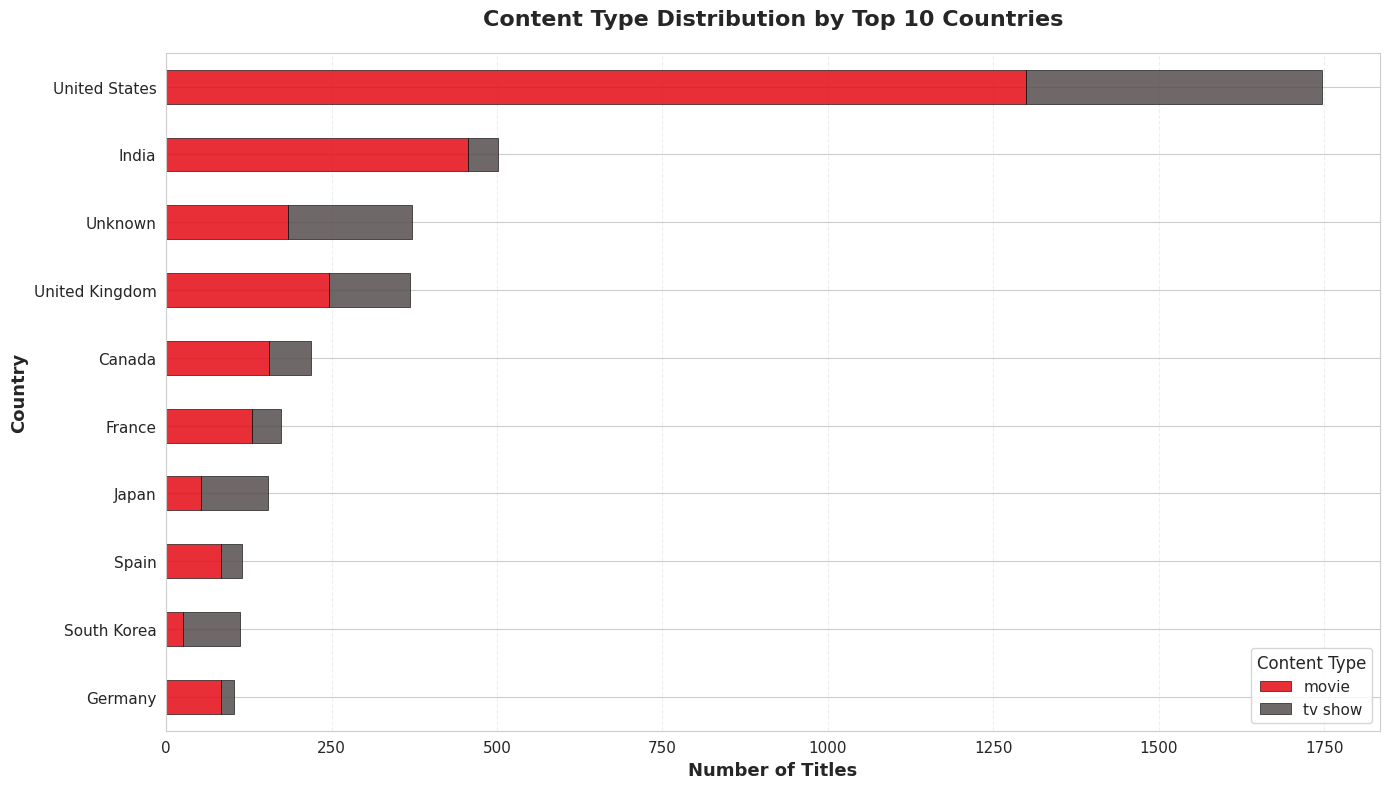

In [0]:

plt.figure(figsize=(14, 8))
pivot_df.plot(kind='barh', stacked=True, 
              color=['#E50914', '#564d4d'], 
              alpha=0.85, ax=plt.gca(),
              edgecolor='black', linewidth=0.5)
plt.title('Content Type Distribution by Top 10 Countries', 
          fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Number of Titles', fontsize=13, fontweight='bold')
plt.ylabel('Country', fontsize=13, fontweight='bold')
plt.legend(title='Content Type', fontsize=11, title_fontsize=12)
plt.grid(True, alpha=0.3, axis='x', linestyle='--')
plt.tick_params(labelsize=11)
plt.tight_layout()
plt.show()


In [0]:
print("📊 NETFLIX DATA ANALYSIS - EXECUTIVE SUMMARY")

📊 NETFLIX DATA ANALYSIS - EXECUTIVE SUMMARY


In [0]:

print(f"\n📈 DATASET OVERVIEW:")
print(f"  • Total Unique Titles: {df.count():,}")
print(f"  • Date Range: {content_by_year_pd['release_year'].min()} - {content_by_year_pd['release_year'].max()}")
print(f"  • Platform Activity: {content_added_pd['added_year'].min()} - {content_added_pd['added_year'].max()}")

print(f"\n🎬 CONTENT TYPE:")
for idx, row in content_type_pd.iterrows():
    pct = (row['count'] / total_content) * 100
    print(f"  • {row['type']}: {row['count']:,} ({pct:.1f}%)")

print(f"\n🌟 TOP GENRES:")
for idx, row in genre_pd.head(3).iterrows():
    print(f"  • {row['genre']}: {row['count']:,} titles")

print(f"\n🌍 TOP COUNTRIES:")
for idx, row in country_pd.head(3).iterrows():
    print(f"  • {row['country']}: {row['count']:,} titles")

print(f"\n⭐ MOST COMMON RATING: {rating_pd.iloc[0]['rating']} ({rating_pd.iloc[0]['count']:,} titles)")

print(f"\n📊 DIVERSITY METRICS:")
print(f"  • Unique Genres: {genre_dist.count()}")
print(f"  • Countries Represented: {country_dist.count()}")
print(f"  • Rating Categories: {rating_dist.count()}")



📈 DATASET OVERVIEW:
  • Total Unique Titles: 4,103
  • Date Range: 1925 - 2021
  • Platform Activity: 2008 - 2021

🎬 CONTENT TYPE:
  • movie: 2,827 (68.9%)
  • tv show: 1,276 (31.1%)

🌟 TOP GENRES:
  • International Movies: 1,232 titles
  • Dramas: 1,131 titles
  • Comedies: 773 titles

🌍 TOP COUNTRIES:
  • United States: 1,747 titles
  • India: 501 titles
  • Unknown: 372 titles

⭐ MOST COMMON RATING: TV-MA (1,505 titles)

📊 DIVERSITY METRICS:
  • Unique Genres: 42
  • Countries Represented: 91
  • Rating Categories: 14
